In [25]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [26]:
(xtrain, ytrain),(xtest, ytest)=mnist.load_data()

In [27]:
xtrain.shape

(60000, 28, 28)

In [28]:
xtest.shape

(10000, 28, 28)

In [65]:
img= xtrain[50]
img.shape

(28, 28)

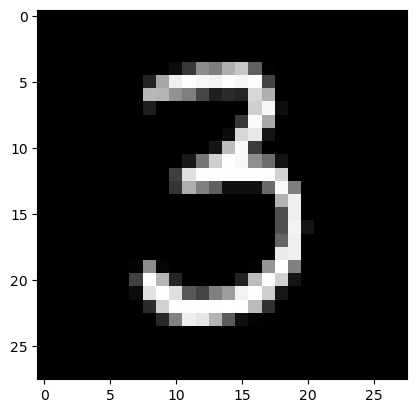

In [66]:
plt.imshow(img,cmap='gray')

In [31]:
xtrainS=xtrain/255.0
xtestS=xtest/255.0

In [32]:
ytren = utils.to_categorical(ytrain,10)
yteen = utils.to_categorical(ytest,10)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

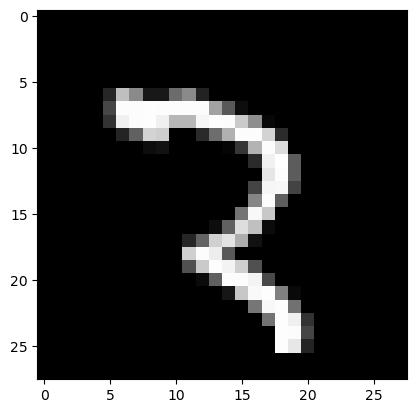

In [33]:
img = xtrain[500]
plt.imshow(img,cmap='gray')
ytren[500]

In [34]:
xtrainS = xtrainS.reshape(-1,28,28,1)
xtestS = xtestS.reshape(-1,28,28,1)

In [35]:
model = keras.Sequential()
model.add(layers.Input (shape=(28,28,1)))
model.add(layers.Conv2D (filters=32, kernel_size=(7,7), activation='relu'))
model.add(layers.MaxPool2D (pool_size=(3,3)))
model.add(layers.Flatten())
model.add(layers.Dense (32, activation='relu'))
model.add(layers.Dense (16, activation='relu'))
model.add(layers.Dense (8, activation='relu'))
model.add(layers.Dense (10, activation='softmax'))

In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 32)          │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │          50,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │              90 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,562 (205.32 KB)

 Trainable params: 52,562 (205.32 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
model.fit(xtrainS,ytren,epochs=15,batch_size=256,validation_data=(xtestS,yteen))

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.5977 - loss: 1.2534 - val_accuracy: 0.9132 - val_loss: 0.3013
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9196 - loss: 0.2756 - val_accuracy: 0.9486 - val_loss: 0.1808
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9500 - loss: 0.1713 - val_accuracy: 0.9629 - val_loss: 0.1247
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9627 - loss: 0.1317 - val_accuracy: 0.9690 - val_loss: 0.1042
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9693 - loss: 0.1075 - val_accuracy: 0.9745 - val_loss: 0.0862
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9727 - loss: 0.0897 - val_accuracy: 0.9783 - val_loss: 0.0759
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9762 - loss: 0.0787 - val_accuracy: 0.9788 - val_loss: 0.0683
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9797 - loss: 0.0663 - val_acc

<AxesSubplot:>

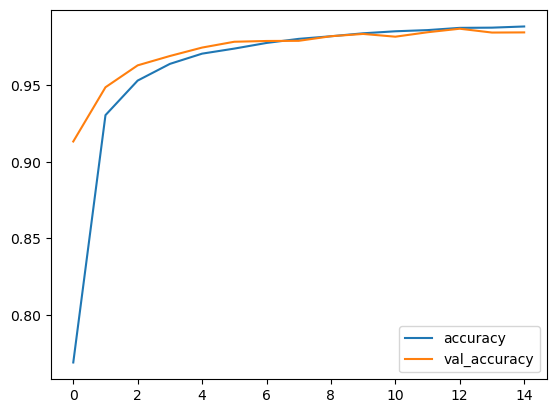

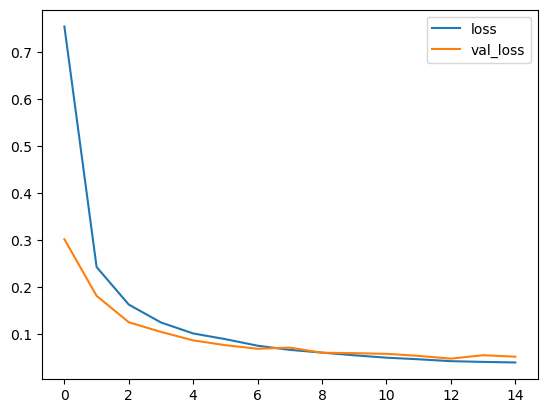

In [39]:
metrics = pd.DataFrame(model.history.history)
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()

In [18]:
ypred = np.argmax(model.predict(xtestS), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [70]:
print(confusion_matrix(ytest,ypred))
print()
print(classification_report(ytest,ypred))

[[ 973    0    1    0    1    1    1    1    2    0]
 [   0 1132    1    1    1    0    0    0    0    0]
 [   1    3 1011    0    5    0    0    6    6    0]
 [   0    2    2  995    0    9    0    0    2    0]
 [   0    0    1    0  976    0    1    2    1    1]
 [   1    1    0    2    0  887    1    0    0    0]
 [   6    2    0    0    7    3  939    1    0    0]
 [   0    4    6    0    5    0    0 1012    1    0]
 [   4    4    0    1    4    1    1    0  956    3]
 [   3    2    4    1   27   11    0    8    1  952]]

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.95      0.99      0.97       982
           5       0.97      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.98  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([0], dtype=int64)

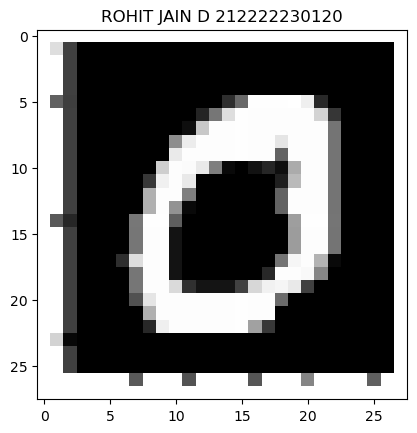

In [69]:
img = image.load_img('image.png')
tensor_img = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(tensor_img,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
plt.title('ROHIT JAIN D 212222230120')
np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)